In [1]:
import pandas as pd

In [2]:
# Load the full datasets for detailed exploration, starting with the main application train and test datasets
application_train = pd.read_csv("C:/Users/shume/Downloads/CAP_Data/application_train.csv")
application_test = pd.read_csv("C:/Users/shume/Downloads/CAP_Data/application_test.csv")

# Summarize the application train dataset to understand its structure and content
train_summary = {
    "Shape": application_train.shape,
    "Missing Values": application_train.isnull().sum().sort_values(ascending=False),
    "Data Types": application_train.dtypes.value_counts(),
    "Sample Data": application_train.head()
}

train_summary


{'Shape': (307511, 122),
 'Missing Values': COMMONAREA_MEDI             214865
 COMMONAREA_AVG              214865
 COMMONAREA_MODE             214865
 NONLIVINGAPARTMENTS_MODE    213514
 NONLIVINGAPARTMENTS_AVG     213514
                              ...  
 NAME_HOUSING_TYPE                0
 NAME_FAMILY_STATUS               0
 NAME_EDUCATION_TYPE              0
 NAME_INCOME_TYPE                 0
 SK_ID_CURR                       0
 Length: 122, dtype: int64,
 'Data Types': float64    65
 int64      41
 object     16
 Name: count, dtype: int64,
 'Sample Data':    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
 0      100002       1         Cash loans           M            N   
 1      100003       0         Cash loans           F            N   
 2      100004       0    Revolving loans           M            Y   
 3      100006       0         Cash loans           F            N   
 4      100007       0         Cash loans           M            N   
 
   FLAG_O

In [3]:
import numpy as np

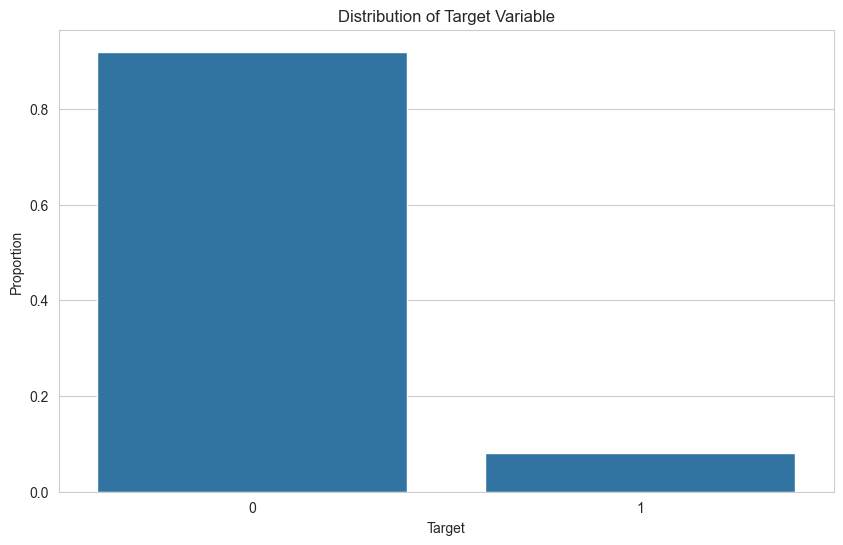

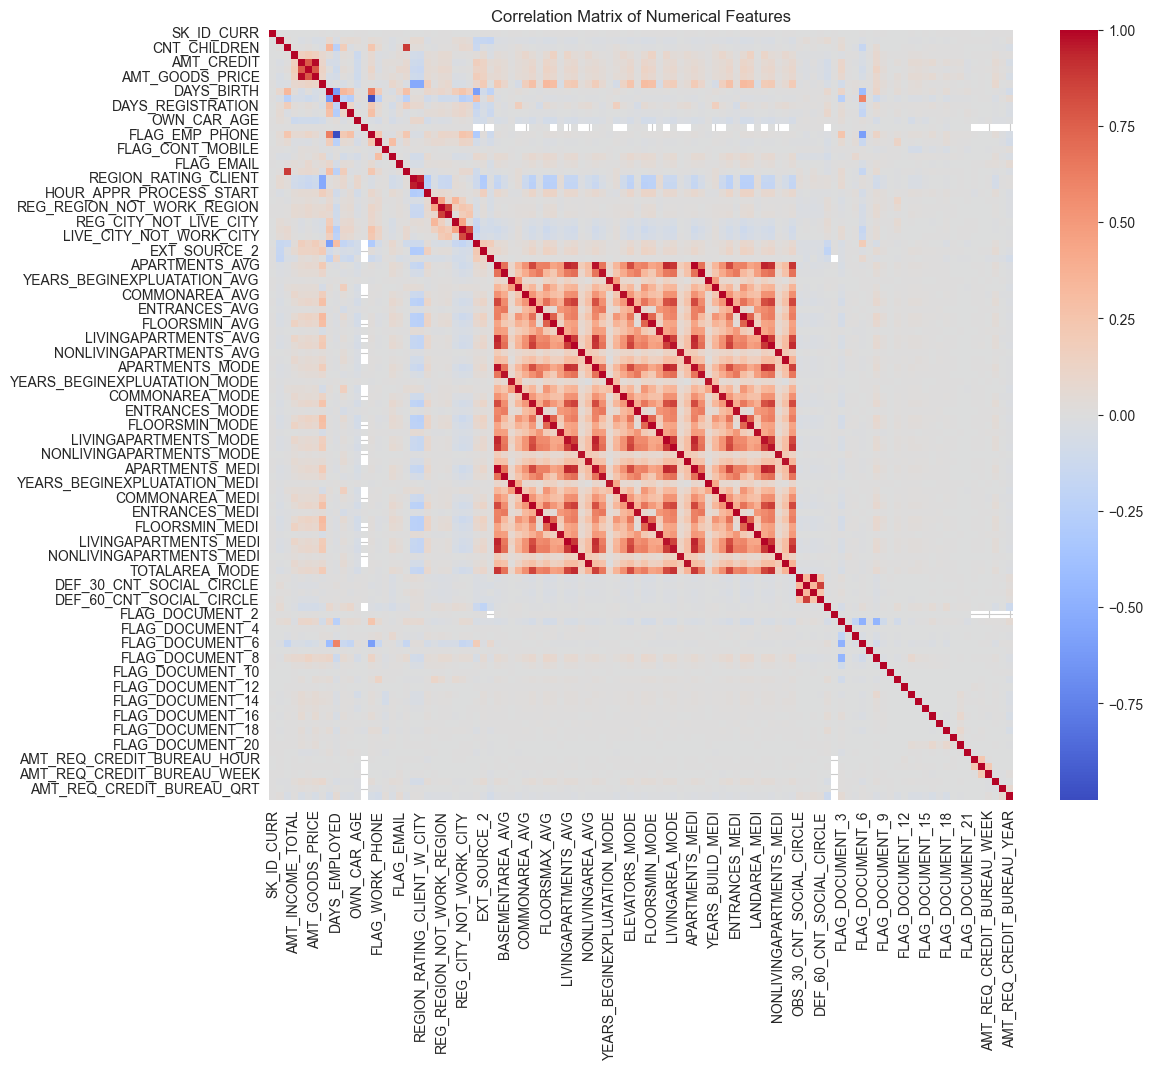

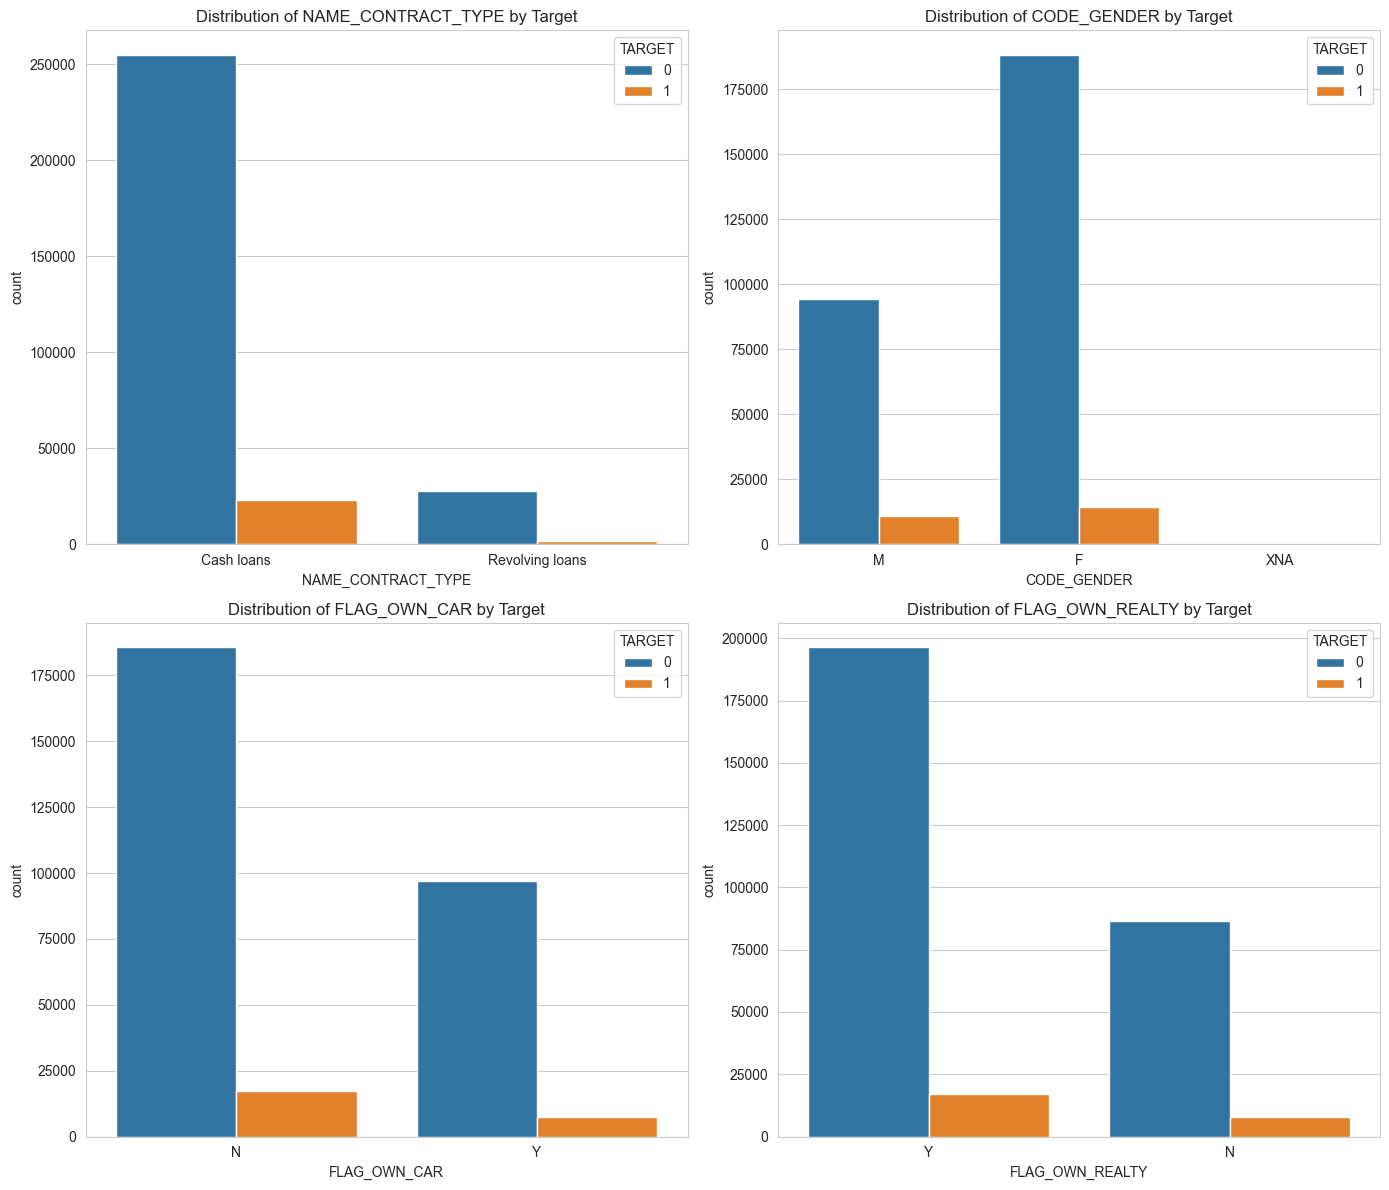

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Explore the distribution of the target variable
target_distribution = application_train['TARGET'].value_counts(normalize=True)

# Correlation analysis of numerical features
correlation_matrix = application_train.select_dtypes(include=[np.number]).corr()

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Proportion')

plt.show()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')

plt.show()

# Analyzing the relationship of some categorical variables with the target variable
categorical_vars = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
for i, var in enumerate(categorical_vars):
    row, col = i // 2, i % 2
    sns.countplot(x=var, hue='TARGET', data=application_train, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var} by Target')

plt.tight_layout()
plt.show()


Here are the insights from the data exploration:

Target Variable Distribution:

The distribution shows a significant imbalance, with a larger proportion of loans being repaid on time (Target = 0) compared to those with payment difficulties (Target = 1). This imbalance will need to be considered during model training to ensure accurate predictive performance.
Correlation Analysis:

The heatmap of the correlation matrix indicates varying degrees of relationships among the numerical features. Some features exhibit moderate correlations with each other, but there don’t seem to be extremely high correlations that would immediately warrant concern for multicollinearity.
Categorical Variable Analysis:

The count plots for categorical variables like NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, and FLAG_OWN_REALTY show differences in distribution between the two classes of the target variable. For instance, there are notable differences in the TARGET distribution between genders and between those owning a car and those who don’t.
These relationships suggest that these categorical variables may have some predictive power and should be considered in the modeling process.

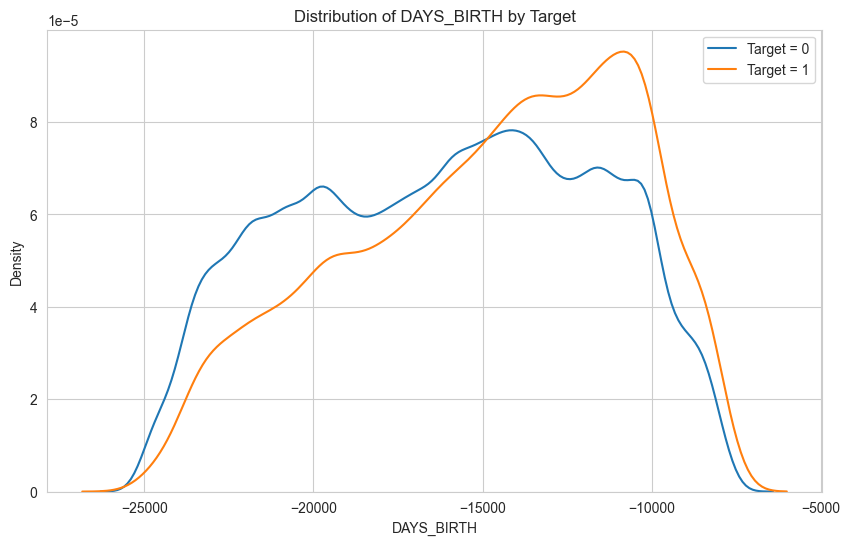

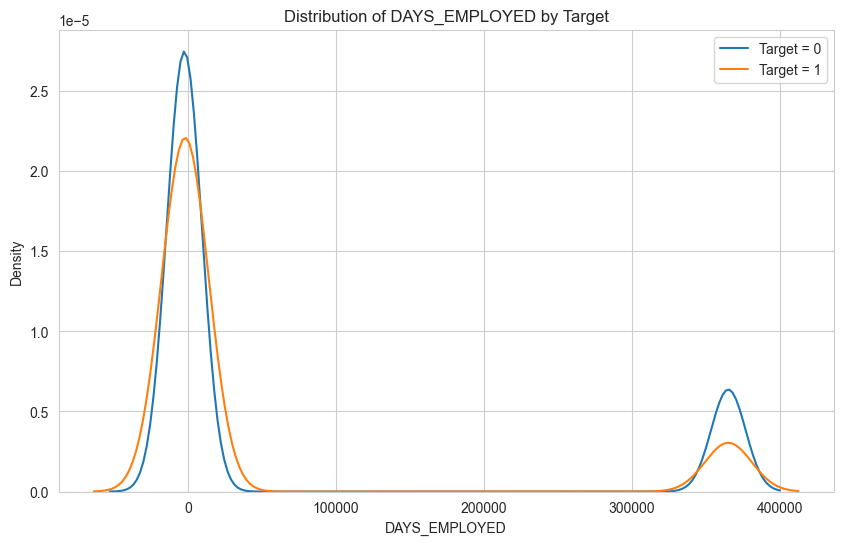

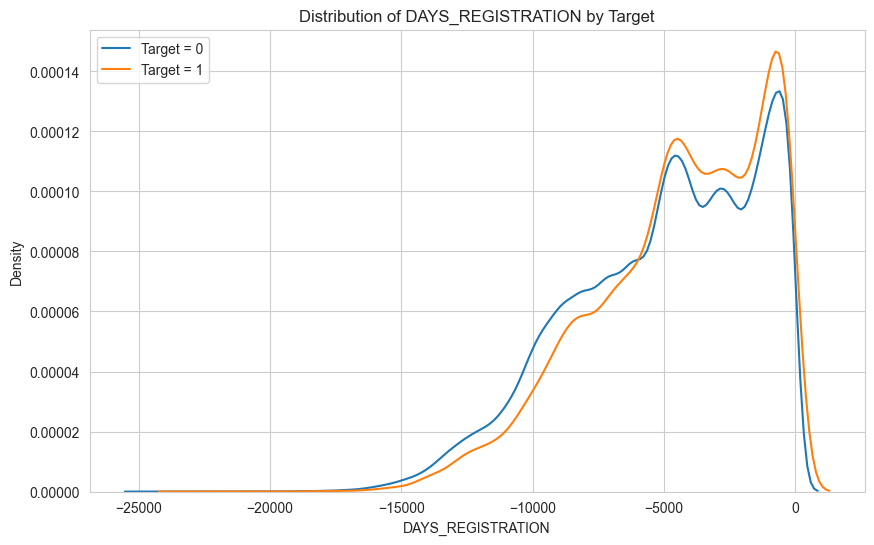

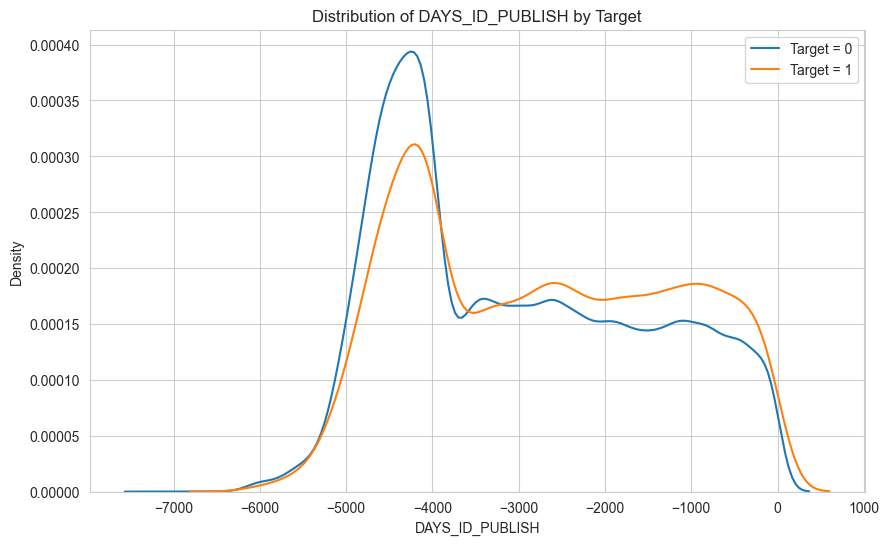

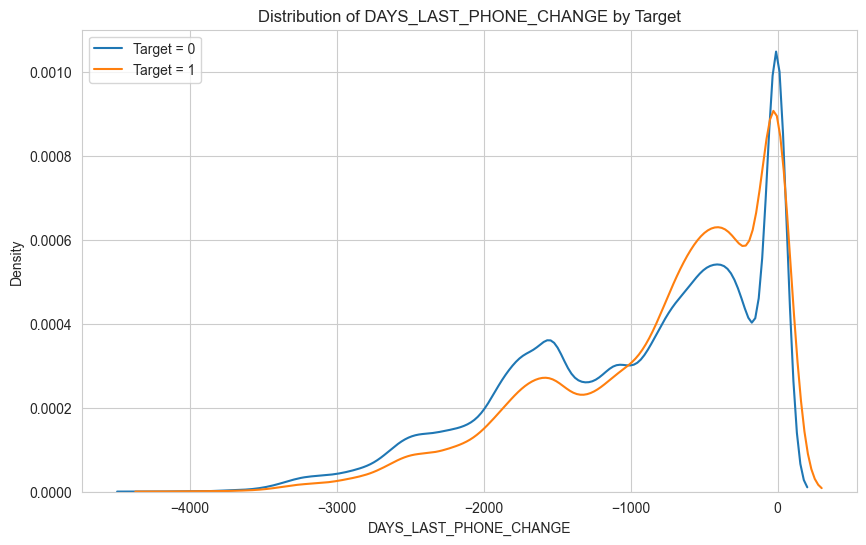

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [5]:
# Identify time-related features in the application train dataset
time_related_features = [col for col in application_train.columns if 'DAYS' in col or 'MONTHS' in col]

# Summarize the time-related features
time_features_summary = application_train[time_related_features].describe()

# Analyze the relationship of time-related features with the target variable
time_related_figures = {}
for feature in time_related_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, feature], label='Target = 0')
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, feature], label='Target = 1')
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

time_features_summary


The analysis of time-related features in the application train dataset reveals several key insights:

Time-related Features:

The features include DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, and DAYS_LAST_PHONE_CHANGE.
These features represent various time aspects of the applicant's life and history, such as age, length of employment, registration of their ID, publication of their ID, and last phone change.
Summary Statistics:

DAYS_BIRTH: Indicates the age of the client in days at the time of application; clients are between approximately 21 and 69 years old.
DAYS_EMPLOYED: Shows the duration of employment. There are anomalies, like a max value of 365243 days, which likely indicate missing or placeholder values.
DAYS_REGISTRATION: The time since the client’s ID was registered; ranges from a few days to over 40 years.
DAYS_ID_PUBLISH: Days since the ID was last published, which varies from recent to over 17 years ago.
DAYS_LAST_PHONE_CHANGE: Time since the client last changed their phone, ranging from 0 (recent change) to about 9 years.
Distribution Analysis by Target:

The KDE plots (Kernel Density Estimates) for these features show differences in distributions between clients who had difficulties with loan repayments (Target = 1) and those who did not (Target = 0).
For example, DAYS_BIRTH and DAYS_EMPLOYED distributions indicate potential patterns related to the client's age and employment history that could affect loan repayment.
Understanding these time-based patterns can be crucial for predicting credit approval. For instance, younger applicants or those with shorter employment history may exhibit different risk profiles compared to older applicants or those employed longer.

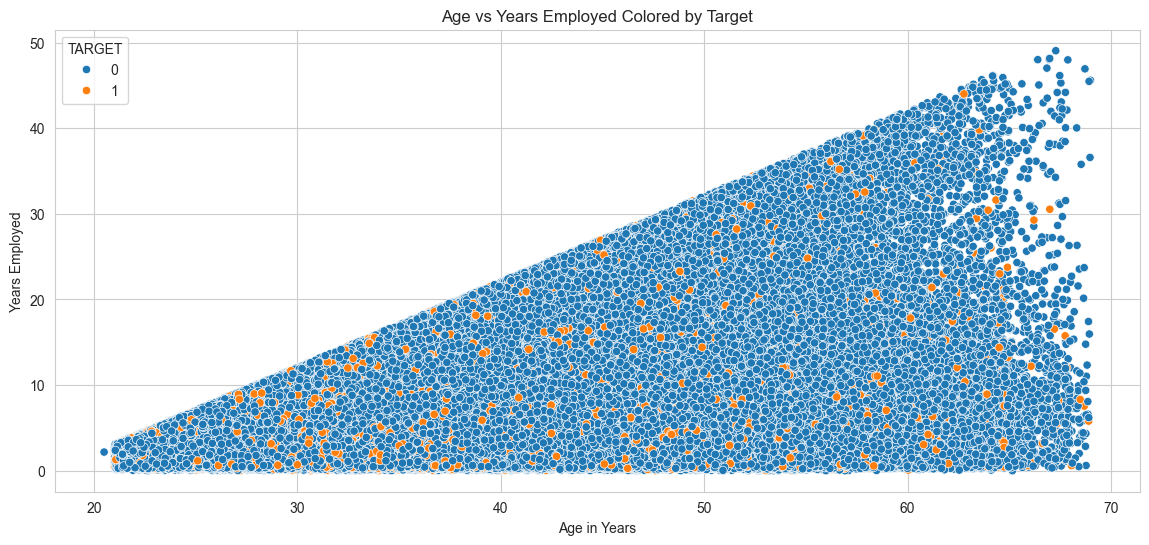

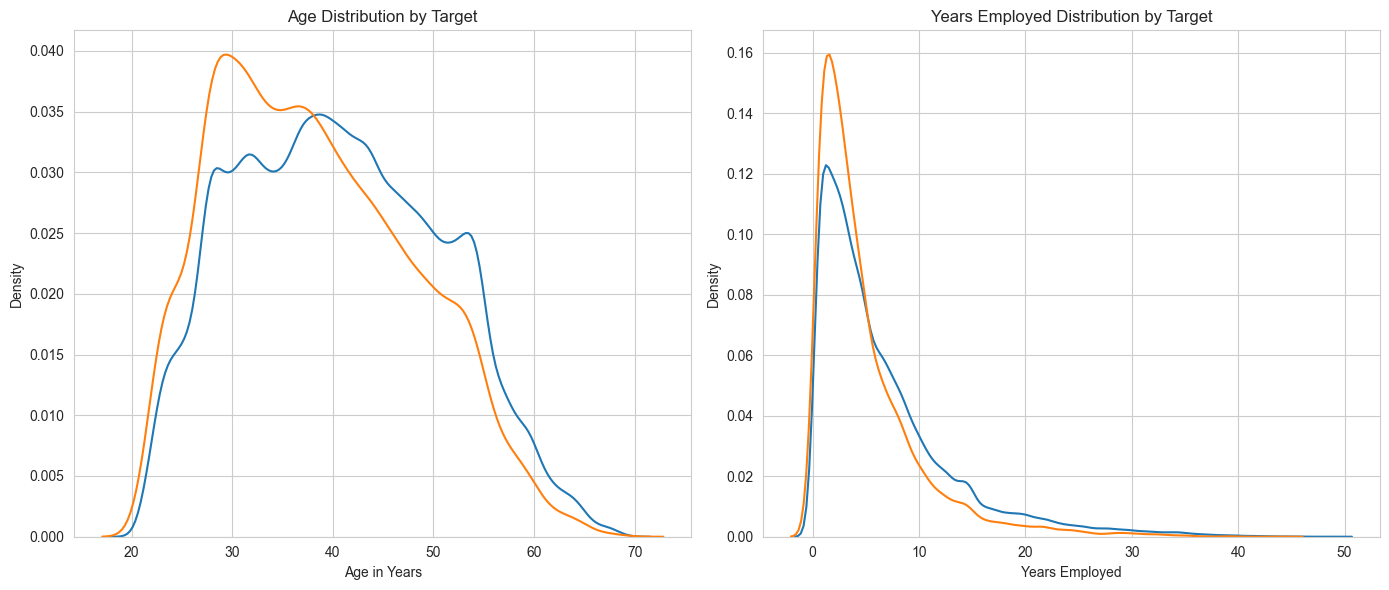

In [6]:
# Convert days to years for better interpretability
application_train['AGE_YEARS'] = application_train['DAYS_BIRTH'] / -365.25
application_train['YEARS_EMPLOYED'] = application_train['DAYS_EMPLOYED'] / -365.25

# Filter out anomalous values (like very high days of employment which do not make sense)
application_train = application_train[application_train['DAYS_EMPLOYED'] < 0]

# Analyze the relationship between age, years employed and target variable
plt.figure(figsize=(14, 6))
sns.scatterplot(x='AGE_YEARS', y='YEARS_EMPLOYED', hue='TARGET', data=application_train)
plt.title('Age vs Years Employed Colored by Target')
plt.xlabel('Age in Years')
plt.ylabel('Years Employed')
plt.show()

# Analyze the distribution of Age and Years Employed by Target
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'AGE_YEARS'], label='Target = 0', ax=ax[0])
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'AGE_YEARS'], label='Target = 1', ax=ax[0])
ax[0].set_title('Age Distribution by Target')
ax[0].set_xlabel('Age in Years')
ax[0].set_ylabel('Density')

sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'YEARS_EMPLOYED'], label='Target = 0', ax=ax[1])
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'YEARS_EMPLOYED'], label='Target = 1', ax=ax[1])
ax[1].set_title('Years Employed Distribution by Target')
ax[1].set_xlabel('Years Employed')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


The analysis of age and employment history in relation to credit approval reveals the following:

Age vs. Years Employed Scatter Plot:

The scatter plot shows a wide distribution of employment years across different ages. Notably, applicants with payment difficulties (Target = 1) are scattered throughout but seem to have shorter employment periods, especially in the younger age bracket.
Age Distribution by Target:

The Kernel Density Estimate (KDE) plots show that younger applicants are more likely to have payment difficulties (Target = 1). The distribution for those with no payment difficulties (Target = 0) is broader, indicating a wider age range.
Years Employed Distribution by Target:

Applicants with fewer years of employment appear more likely to experience payment difficulties. The distribution for those with no payment difficulties is more spread out, suggesting that longer employment history may correlate with better loan repayment behavior.
These findings suggest that both age and length of employment are important factors in predicting creditworthiness. Younger applicants and those with shorter employment history may represent higher risk, which could be crucial for building a predictive model for credit approval.

In [7]:
# Feature Engineering on the application train dataset
# We will create new features that might help improve the model's performance

# Create new features based on existing data
application_train['CREDIT_INCOME_PERCENT'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['ANNUITY_INCOME_PERCENT'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TERM'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
application_train['DAYS_EMPLOYED_PERCENT'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']

# Overview of the new features
new_features = ['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']
application_train[new_features].describe()


,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
count,252135.000000,252123.000000,252123.000000,252135.000000
mean,3.857996,0.177266,0.053892,0.156863
std,2.572014,0.090983,0.022521,0.133548
min,0.004808,0.000224,0.022073,0.000042
25%,2.000000,0.112500,0.037060,0.056100
50%,3.181818,0.160333,0.050000,0.118734
75%,5.020000,0.224960,0.064314,0.219170
max,36.692308,1.451571,0.124430,0.728811


In the feature engineering step, we created four new features that could enhance the model's ability to predict credit approval:

Credit to Income Percentage (CREDIT_INCOME_PERCENT):

Represents the ratio of the credit amount to the applicant's total income. Higher values may indicate higher debt burden relative to income.
Annuity to Income Percentage (ANNUITY_INCOME_PERCENT):

The proportion of the loan annuity to the applicant's income. This ratio reflects the repayment burden; higher values could suggest a higher risk of payment difficulties.
Credit Term (CREDIT_TERM):

The ratio of the loan annuity to the credit amount, effectively representing the loan repayment period. Longer terms may imply smaller monthly payments but could also indicate a longer debt commitment.
Days Employed Percentage (DAYS_EMPLOYED_PERCENT):

The ratio of days employed to the applicant's age in days. This feature provides insight into the employment stability of the applicant relative to their age.
These new features aim to provide additional insights into the applicants' financial health and repayment ability, which are critical for making informed credit approval decisions.

In [8]:
# Load other data files to identify and create relevant features
bureau = pd.read_csv("C:/Users/shume/Downloads/CAP_Data/bureau.csv")
previous_application = pd.read_csv("C:/Users/shume/Downloads/CAP_Data/previous_application.csv")

# Summarize the bureau and previous application data
bureau_summary = bureau.describe()
previous_application_summary = previous_application.describe()

# Create features based on the bureau data
# For example, calculate the total number of past loans per customer, average credit amount, etc.
bureau_agg = bureau.groupby('SK_ID_CURR').agg({'SK_ID_BUREAU': 'count', 'AMT_CREDIT_SUM': 'mean'}).rename(columns={
    'SK_ID_BUREAU': 'BUREAU_LOAN_COUNT',
    'AMT_CREDIT_SUM': 'AVG_CREDIT_SUM'
})

# Create features based on previous applications
# For example, calculate the total number of previous applications, average requested amount, etc.
previous_application_agg = previous_application.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'AMT_APPLICATION': 'mean'
}).rename(columns={
    'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT',
    'AMT_APPLICATION': 'AVG_APPLICATION_AMOUNT'
})

# Join these aggregated features with the main application train dataset
application_train = application_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(previous_application_agg, on='SK_ID_CURR', how='left')

# Overview of the newly joined features
new_bureau_features = application_train[['BUREAU_LOAN_COUNT', 'AVG_CREDIT_SUM']]
new_previous_application_features = application_train[['PREVIOUS_APPLICATION_COUNT', 'AVG_APPLICATION_AMOUNT']]

new_bureau_features.describe(), new_previous_application_features.describe()


(       BUREAU_LOAN_COUNT  AVG_CREDIT_SUM
 count      216475.000000    2.164740e+05
 mean            5.583236    4.100348e+05
 std             4.380794    9.687670e+05
 min             1.000000    0.000000e+00
 25%             2.000000    1.055922e+05
 50%             4.000000    2.091828e+05
 75%             8.000000    4.342175e+05
 max           116.000000    1.980723e+08,
        PREVIOUS_APPLICATION_COUNT  AVG_APPLICATION_AMOUNT
 count               238466.000000            2.384660e+05
 mean                     4.781013            1.530682e+05
 std                      4.049168            1.562380e+05
 min                      1.000000            0.000000e+00
 25%                      2.000000            6.075281e+04
 50%                      4.000000            1.038139e+05
 75%                      6.000000            1.881342e+05
 max                     73.000000            4.050000e+06)

In [9]:
# Load the credit card balance and installments payments data
credit_card_balance = pd.read_csv("C:/Users/shume/Downloads/CAP_Data/credit_card_balance.csv")
installments_payments = pd.read_csv("C:/Users/shume/Downloads/CAP_Data/installments_payments.csv")

# Summarize the credit card balance data to identify potential features
credit_card_balance_summary = credit_card_balance.describe()

# Create aggregated features from credit card balance data
credit_card_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': ['mean', 'max', 'min', 'sum'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['mean', 'max'],
    'AMT_DRAWINGS_ATM_CURRENT': ['mean', 'sum'],
    'AMT_DRAWINGS_CURRENT': ['mean', 'sum'],
    'AMT_PAYMENT_TOTAL_CURRENT': ['mean', 'sum'],
    'CNT_DRAWINGS_ATM_CURRENT': ['mean', 'sum'],
    'CNT_DRAWINGS_CURRENT': ['mean', 'sum']
})

# Rename the aggregated columns for clarity
credit_card_agg.columns = ['_'.join(col).upper() for col in credit_card_agg.columns]

# Summarize the installments payments data to identify potential features
installments_payments_summary = installments_payments.describe()

# Create aggregated features from installments payments data
installments_payments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'NUM_INSTALMENT_VERSION': ['mean', 'sum'],
    'NUM_INSTALMENT_NUMBER': ['max'],
    'AMT_INSTALMENT': ['mean', 'sum'],
    'AMT_PAYMENT': ['mean', 'sum'],
    'DAYS_INSTALMENT': ['mean', 'max', 'min'],
    'DAYS_ENTRY_PAYMENT': ['mean', 'max', 'min']
})

# Rename the aggregated columns for clarity
installments_payments_agg.columns = ['_'.join(col).upper() for col in installments_payments_agg.columns]

credit_card_agg.head(), installments_payments_agg.head()


(            AMT_BALANCE_MEAN  AMT_BALANCE_MAX  AMT_BALANCE_MIN  \
 SK_ID_CURR                                                       
 100006              0.000000             0.00              0.0   
 100011          54482.111149        189000.00              0.0   
 100013          18159.919219        161420.22              0.0   
 100021              0.000000             0.00              0.0   
 100023              0.000000             0.00              0.0   
 
             AMT_BALANCE_SUM  AMT_CREDIT_LIMIT_ACTUAL_MEAN  \
 SK_ID_CURR                                                  
 100006                0.000                 270000.000000   
 100011          4031676.225                 164189.189189   
 100013          1743352.245                 131718.750000   
 100021                0.000                 675000.000000   
 100023                0.000                 135000.000000   
 
             AMT_CREDIT_LIMIT_ACTUAL_MAX  AMT_DRAWINGS_ATM_CURRENT_MEAN  \
 SK_ID_CURR       

These features, reflecting the clients' past financial behavior, could be very useful in predicting their ability to repay loans, enhancing the predictive model's performance.

In [11]:
# Merge the aggregated features from credit card balance and installments payments with the application train data
application_train = application_train.merge(credit_card_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(installments_payments_agg, on='SK_ID_CURR', how='left')

application_train = application_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
application_train = application_train.merge(previous_application_agg, on='SK_ID_CURR', how='left')



# Check the shape of the updated training data and preview the newly integrated features
application_train.shape, application_train.columns[-20:]  # Displaying the last 20 columns to see some of the new features

# Save the final merged DataFrame to a CSV file
application_train.to_csv('C:/Users/shume/Downloads/CAP_Data/final_dataset.csv', index=False)



Given the current state of our training data and the goal to build a credit risk predictive analysis model, we should focus on the following strategies:

Data Matching and Alignment:

Prioritize ensuring that the keys (SK_ID_CURR) match correctly across datasets to maximize the data available for each applicant. This might involve a more detailed examination of the keys or a review of the data extraction process to ensure completeness.
Handling Missing Data:

Given the presence of missing values, especially in the newly integrated features, develop a systematic approach for handling these missing values. Depending on the distribution and importance of the missing features, we can consider imputation, using placeholders (like mean or median), or even creating binary indicators that flag missing data.
Feature Engineering:

Continue with robust feature engineering to create variables that are significant predictors of credit risk. This can include interaction terms, polynomial features, or aggregations that can capture complex patterns in the data.
For the features derived from the external datasets (bureau, previous_application, etc.), we should ensure they are meaningfully contributing to the model. If the data is too sparse, we might consider generating summary statistics or categorical groupings that are less affected by missing values.
Temporal Alignment:

If applicable and data permits, align features temporally to reflect the applicant's situation at the time of the loan application. This ensures the model is using relevant historical information.
Robust Modeling Techniques:

Choose machine learning algorithms that are capable of handling the complexities of the dataset, including missing values and non-linear relationships. Tree-based models like Random Forests or Gradient Boosting Machines (GBMs) are often well-suited for this type of data due to their ability to handle missing values and capture complex patterns through their hierarchical structure.
Validation and Model Assessment:

Implement rigorous validation techniques to assess the model's performance accurately, using strategies like cross-validation or bootstrapping, especially given the imbalanced nature of the target variable in credit risk modeling.
By implementing these strategies, we aim to build a robust and predictive model that can accurately assess credit risk based on the available data. The focus should be on maximizing the informational value of the existing data and ensuring that the model is validated effectively against real-world outcomes.